In [27]:
import folium

# 서울역 위도 경도를 AI에게 물어왔다.

seoul = folium.Map(location=[37.5558,126.9723], zoom_start = 20)
seoul

In [2]:
import pandas as pd

data = pd.read_csv("./cafe/소상공인시장진흥공단_상가(상권)정보_서울_202312.csv")

data

C:\Users\marin\AppData\Local\Temp\ipykernel_32960\223357235.py:3: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("./cafe/소상공인시장진흥공단_상가(상권)정보_서울_202312.csv")


,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,...,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
0,MA010120220805430767,토끼정,NaN,I2,음식,I201,한식,I20101,백반/한정식,I56111,...,1150010500107740012000001,마커스빌딩,서울특별시 강서구 마곡동로 55,157805,7802,NaN,2,NaN,126.833022,37.560053
1,MA010120220805430763,카페숲,NaN,I2,음식,I212,비알코올,I21201,카페,I56221,...,1154510300109290010016890,NaN,서울특별시 금천구 시흥대로40길 129,153860,8647,NaN,1,NaN,126.909939,37.446689
2,MA010120220805430969,다이앤,NaN,G2,소매,G209,섬유·의복·신발 소매,G20902,여성 의류 소매업,G47412,...,1114016200107750000009546,제일평화시장,서울특별시 중구 마장로 13,100837,4567,NaN,1,NaN,127.011381,37.568503
3,MA010120220805431023,숯불에닭,NaN,I2,음식,I201,한식,I20110,닭/오리고기 구이/찜,I56111,...,1147010300109710004007555,NaN,서울특별시 양천구 지양로 60,158846,8040,NaN,1,NaN,126.834524,37.520990
4,MA010120220805431191,맑은에스테틱,NaN,S2,수리·개인,S208,욕탕·신체관리,S20802,마사지/안마,S96122,...,1121510500100480053015378,NaN,서울특별시 광진구 뚝섬로32길 33,143843,5085,NaN,1,NaN,127.066814,37.534047
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
489867,MA010120220804254954,모아모아세탁,NaN,S2,수리·개인,S209,세탁,S20901,세탁소,S96912,...,1171010400101630001011783,NaN,서울특별시 송파구 송이로 19,138853,5672,NaN,1,NaN,127.116361,37.503378
489868,MA010120220808716142,지에스25강동,NaN,G2,소매,G204,종합 소매,G20405,편의점,G47122,...,1174010800100780010006592,케이디빌딩,서울특별시 강동구 올림픽로 622,134840,5378,NaN,NaN,NaN,127.123174,37.536903
489869,MA010120220806734217,런베이,NaN,S2,수리·개인,S203,자동차 수리·세차,S20302,자동차 세차장,S95213,...,1147010100102080010000365,이엠피빌딩,서울특별시 양천구 목동남로4길 31,158851,8101,NaN,1,NaN,126.866017,37.509097
489870,MA010120220806779253,북카페,NaN,I2,음식,I212,비알코올,I21201,카페,I56221,...,1123010200100290003038276,용두문화복지센터,서울특별시 동대문구 고산자로28길 13,130817,2565,NaN,2,NaN,127.039129,37.575300


In [3]:
from geopy.distance import geodesic
from shapely.geometry import Point
import pyproj

# 서울역의 위도와 경도
seoul_station = (37.5558, 126.9723)

# 반지름 200m의 원을 그리기
proj_wgs84 = pyproj.Proj(init='epsg:4326')  # WGS84 coordinate system
proj_meters = pyproj.Proj(init='epsg:5186')  # South Korea Unified Coordinate System
radius_meters = 200
circle_points = []
for angle in range(0, 360, 10):
    x = radius_meters * 0.001 * geodesic().destination((seoul_station[0], seoul_station[1]), 90, angle).latitude
    y = radius_meters * 0.001 * geodesic().destination((seoul_station[0], seoul_station[1]), 0, angle).longitude
    lon, lat = pyproj.transform(proj_meters, proj_wgs84, x, y)
    circle_points.append((lat, lon))

print(circle_points)

C:\Anaconda\Lib\site-packages\pyproj\crs\crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Anaconda\Lib\site-packages\pyproj\crs\crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\marin\AppData\Local\Temp\ipykernel_32960\3729871639.py:16: FutureWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  lon, lat = pyproj.transform(proj_meter

[(32.57415695786237, 124.87035233773749), (32.57415695786042, 124.87035233762205), (32.574156957854534, 124.8703523372757), (32.57415695784476, 124.87035233669849), (32.57415695783106, 124.87035233589037), (32.57415695781344, 124.87035233485138), (32.57415695779193, 124.8703523335815), (32.574156957766476, 124.87035233208078), (32.57415695773713, 124.87035233034919), (32.574156957703856, 124.87035232838676), (32.57415695766667, 124.8703523261935), (32.57415695762558, 124.87035232376944), (32.57415695758057, 124.87035232111457), (32.57415695753166, 124.87035231822891), (32.57415695747883, 124.8703523151125), (32.57415695742209, 124.87035231176533), (32.57415695736144, 124.87035230818746), (32.574156957296864, 124.87035230437891), (32.574156957228396, 124.87035230033969), (32.57415695715601, 124.87035229606981), (32.574156957079715, 124.87035229156932), (32.57415695699952, 124.87035228683825), (32.57415695691541, 124.87035228187665), (32.57415695682738, 124.87035227668453), (32.574156956

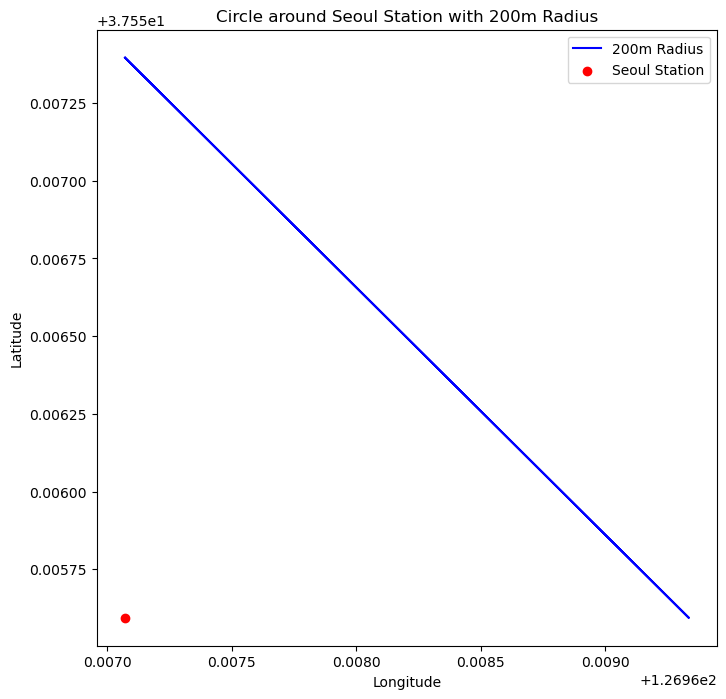

In [4]:
import matplotlib.pyplot as plt
import numpy as np
from geopy.distance import geodesic

# 서울역의 위도와 경도
seoul_station = (37.555594, 126.967071)

# 원을 그리기 위한 각도
angles = np.linspace(0, 2 * np.pi, 360)

# 반지름 200m의 원을 그리기 위한 위도와 경도 계산
circle_lat = np.array([geodesic(kilometers=0.2 * np.cos(angle)).destination(seoul_station, np.degrees(angle)).latitude for angle in angles])
circle_lon = np.array([geodesic(kilometers=0.2 * np.sin(angle)).destination(seoul_station, np.degrees(angle)).longitude for angle in angles])

# 원 그리기
plt.figure(figsize=(8, 8))
plt.plot(circle_lon, circle_lat, 'b-', label='200m Radius')
plt.scatter(seoul_station[1], seoul_station[0], c='red', label='Seoul Station')
plt.legend()
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Circle around Seoul Station with 200m Radius')
plt.show()

In [5]:
import folium
import pandas as pd
from geopy.distance import geodesic

# 지도의 중심을 설정합니다
map = folium.Map(location=[37.5558, 126.9723], zoom_start=10)

# 원을 그릴 위치의 위도와 경도를 설정합니다
circle_lat_lon = [37.5558, 126.9723]

# 원을 추가합니다
folium.Circle(
    location=circle_lat_lon,
    radius=200,  # 원의 반지름 (미터 단위)
    color='crimson',
    fill=True,
    fill_color='crimson'
).add_to(map)

# 데이터프레임에서 원 안에 있는 위치 데이터를 추출합니다
locations_inside_circle = []
for index, row in data.iterrows():
    location = (row['위도'], row['경도'])
    if geodesic(location, circle_lat_lon).meters <= 200:  # 10000미터 이내에 있는지 확인
        locations_inside_circle.append(row['상가업소번호'])

print("원 안에 있는 장소:", locations_inside_circle)

원 안에 있는 장소: ['MA010120220805470653', 'MA010120220805848569', 'MA010120220808001062', 'MA010120220810179114', 'MA010120220811793689', 'MA010120220812772698', 'MA010120220813149036', 'MA010120220813127593', 'MA010120220813782210', 'MA010120220814016641', 'MA010120220800138135', 'MA010120220800138936', 'MA010120220800167112', 'MA010120220800746413', 'MA010120220800957691', 'MA010120220801835659', 'MA010120220802860214', 'MA010120220803240982', 'MA010120220803558869', 'MA010120220803948483', 'MA010120220804018738', 'MA010120220805060374', 'MA010120220805158160', 'MA0101202209A0082986', 'MA0101202209A0088199', 'MA0106202301A0054307', 'MA0101202305A0206480', 'MA0101202308A0002220', 'MA010120220805468097', 'MA010120220806136848', 'MA010120220806403806', 'MA010120220807171661', 'MA010120220808316810', 'MA010120220808314207', 'MA010120220809712631', 'MA010120220810353613', 'MA010120220811903938', 'MA010120220813165316', 'MA010120220813509956', 'MA010120220813729261', 'MA010120220813685487', 'MA

In [12]:
print(data["상가업소번호"])

0         MA010120220805430767
1         MA010120220805430763
2         MA010120220805430969
3         MA010120220805431023
4         MA010120220805431191
                  ...         
489867    MA010120220804254954
489868    MA010120220808716142
489869    MA010120220806734217
489870    MA010120220806779253
489871    MA010120220809735562
Name: 상가업소번호, Length: 489872, dtype: object


In [21]:
print(data[data["상가업소번호"] == "MA010120220802910133"])


                      상가업소번호       상호명  지점명 상권업종대분류코드 상권업종대분류명 상권업종중분류코드  \
488010  MA010120220802910133  에디션앤드지롯데  NaN        G2       소매      G209   

           상권업종중분류명 상권업종소분류코드   상권업종소분류명 표준산업분류코드  ...  \
488010  섬유·의복·신발 소매    G20905  기타 의류 소매업   G47414  ...   

                           건물관리번호       건물명               도로명주소   구우편번호 신우편번호  \
488010  1117010700100430205024398  서울역(철도역)  서울특별시 용산구 한강대로 405  140761  4320   

        동정보 층정보  호정보          경도         위도  
488010  NaN   3  NaN  126.971712  37.554828  

[1 rows x 39 columns]


In [22]:
print(data[data["상가업소번호"].isin(locations_inside_circle)])

                      상가업소번호         상호명  지점명 상권업종대분류코드 상권업종대분류명 상권업종중분류코드  \
172     MA010120220805470653       남영비비안  NaN        G2       소매      G209   
760     MA010120220805848569  롯데서울역T.W.C  NaN        G2       소매      G209   
5987    MA010120220808001062     옵티마서울약국  NaN        G2       소매      G215   
11832   MA010120220810179114     쥬크롯데아울렛  NaN        G2       소매      G209   
14128   MA010120220811793689      오야니핸드백  NaN        G2       소매      G209   
...                      ...         ...  ...       ...      ...       ...   
473196  MA010120220812658250      쩐주단트루단  NaN        I2       음식      I212   
480187  MA010120220800168030   비알서울역사2호점  NaN        I2       음식      I210   
484618  MA010120220802783323          네파  NaN        G2       소매      G209   
485354  MA010120220812693404        엔피프틴  NaN        P1       교육      P106   
488010  MA010120220802910133    에디션앤드지롯데  NaN        G2       소매      G209   

           상권업종중분류명 상권업종소분류코드   상권업종소분류명 표준산업분류코드  ...  \
172  

In [24]:
seoulStation = data[data["상가업소번호"].isin(locations_inside_circle)]
seoulStation.to_csv('seoulStation.csv')